# Assignment A [25 Marks]

### The NHS has been challenged to make “efficiency savings” and you have been commissioned by an NHS executive to review, document and assess GP prescribing costs. Using data from the HSCIC GP Practice Prescribing dataset for your assigned city only, address the following queries using a combination of narrative, tables, figures and descriptive statistcs:

### 1/. Identify all GP practices (for Wolverhampton) and produce a table with the total number of prescriptions and their total actual cost (using the ACT COST column).

### 2/. Find the top ten most/least frequently prescribed medications across all practices. What is their total actual cost and how does that compare to the overall actual costs of each practice and of the entire city?

### 3/. Find the top ten most expensive medications and calculate their total actual cost.

### 4/. How does prescribing (frequency and costs) in your city compare when using prescribing data from Cambridge as a reference?

### 5/. Pandas dataframes can also be queried using SLQL! The code snippet below gives you an example of how to execute an SQL statement using pandasql. Using SQL, produce a table that provides the number of GP practices per city, ordered in descending order.

### Note:
### In this assignment, prescriptions were considered the number of individual rows in the GP prescribing dataset, (irrespective of the number of the items).
### While, medications were the number of individual items in each prescription.

## Preliminaries

In [1]:
# Importing pandas, numpy, matplotlib and seaborn
import pandas as pd
import numpy as np
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# All GP practices in Wolverhampton presented in a tabulation.
cols2 = ['yearmonth', 'practice', 'name', 'address1', 'address2', 'address3', 'address4', 'postcode']
url='https://s3.eu-west-2.amazonaws.com/dmhr-data/practices_Dec2015.csv'
gp_practices =  pd.read_csv(url, header=None, names=cols2, index_col=False, skiprows=1).rename(columns=lambda x: x.strip())
gp_practices = gp_practices.astype(str).apply(lambda x: x.str.lower())
gp_practices = gp_practices.drop_duplicates()
gp_practices

,yearmonth,practice,name,address1,address2,address3,address4,postcode
0,201512,a81002,queens park medical centre,queens park medical ctr,farrer street,stockton on tees,cleveland,ts18 2aw
1,201512,a81003,victoria medical practice,the health centre,victoria road,hartlepool,cleveland,ts26 8db
2,201512,a81004,woodlands road surgery,6 woodlands road,,middlesbrough,cleveland,ts1 3be
3,201512,a81005,springwood surgery,springwood surgery,rectory lane,guisborough,,ts14 7dj
4,201512,a81006,tennant street medical practice,tennant st med pract,farrer street,stockton on tees,cleveland,ts18 2at
5,201512,a81007,bankhouse surgery,one life hartlepool,park road,hartlepool,cleveland,ts24 7pw
6,201512,a81008,albert house clinic,low grange health village,normanby road,middlesbrough,cleveland,ts6 6td
7,201512,a81009,village medical centre,the village medical ctr,400/404 linthorpe road,middlesbrough,cleveland,ts5 6hf
8,201512,a81011,chadwick practice,one life hartlepool,park road,hartlepool,cleveland,ts24 7pw
9,201512,a81012,westbourne medical centre,westbourne medical centre,7 trinity mews n. ormesby,middlesbrough,,ts3 6al


In [3]:
gp_practices.shape

(9905, 8)

In [4]:
# Total number of prescriptions for all GP practices in Wolverhampton presented in a tabulation.
cols2 = ['sha', 'pct', 'practice', 'bnf_code', 'bnf_name', 'items', 'nic', 'act_cost', 'quantity', 'period']
url='https://s3.eu-west-2.amazonaws.com/dmhr-data/prescribing_Dec2015.csv'
gp_prescriptions = pd.read_csv(url, header=None, names=cols2, index_col=False, skiprows=1).rename(columns=lambda x: x.strip())
gp_prescriptions = gp_prescriptions.astype(str).apply(lambda x: x.str.lower())
gp_prescriptions = gp_prescriptions.drop_duplicates()
gp_prescriptions = gp_prescriptions.round(2)
gp_prescriptions

,sha,pct,practice,bnf_code,bnf_name,items,nic,act_cost,quantity,period
0,q44,rjn,y05218,0501013k0aaajaj,co-amoxiclav_tab 500mg/125mg,1,3.59,3.33,21,201512
1,q44,rjn,y05218,0501130r0aaaaaa,nitrofurantoin_cap 50mg,1,14.39,13.42,28,201512
2,q44,rtv,y04937,0401020k0aaahah,diazepam_tab 2mg,1,0.51,0.58,14,201512
3,q44,rtv,y04937,0401020p0aaabab,lorazepam_tab 1mg,1,2.65,2.46,28,201512
4,q44,rtv,y04937,0402010abaaabab,quetiapine_tab 25mg,2,2.01,2.08,84,201512
5,q44,rtv,y04937,0402010abaaacac,quetiapine_tab 100mg,1,0.56,0.63,14,201512
6,q44,rtv,y04937,0402010abaaavav,quetiapine_tab 50mg m/r,1,7.89,7.41,7,201512
7,q44,rtv,y04937,0402010abaaaxax,quetiapine_tab 300mg m/r,1,79.33,73.46,28,201512
8,q44,rtv,y04937,0402010abaaayay,quetiapine_tab 400mg m/r,1,26.39,24.51,7,201512
9,q44,rtv,y04937,0402010d0aaajaj,chlorpromazine hcl_tab 50mg,1,0.57,0.64,7,201512


In [5]:
gp_prescriptions.shape

(10272116, 10)

In [6]:
# Converting the 'act_cost' column values to floats, items column values as floats and the quantity column values to integers.
gp_prescriptions['act_cost'] = gp_prescriptions['act_cost'].astype(float)
gp_prescriptions['items'] = gp_prescriptions['items'].astype(int)
gp_prescriptions['quantity'] = gp_prescriptions.quantity.astype(int)

In [7]:
# Merge of national practices and their associated prescriptions.
df_national = pd.merge(gp_practices, gp_prescriptions, on='practice')

# The dataframe presents the first 100 national GP practices for representation purposes.
df_national.head(100)

,yearmonth,practice,name,address1,address2,address3,address4,postcode,sha,pct,bnf_code,bnf_name,items,nic,act_cost,quantity,period
0,201512,a81002,queens park medical centre,queens park medical ctr,farrer street,stockton on tees,cleveland,ts18 2aw,q45,00k,0101010c0aaaaaa,alum hydrox_cap 475mg,1,6.4,6.03,56,201512
1,201512,a81002,queens park medical centre,queens park medical ctr,farrer street,stockton on tees,cleveland,ts18 2aw,q45,00k,0101010g0aaabab,co-magaldrox_susp 195mg/220mg/5ml s/f,1,2.99,2.78,500,201512
2,201512,a81002,queens park medical centre,queens park medical ctr,farrer street,stockton on tees,cleveland,ts18 2aw,q45,00k,0101010j0aaaaaa,mag trisil_mix,2,2.56,2.39,400,201512
3,201512,a81002,queens park medical centre,queens park medical ctr,farrer street,stockton on tees,cleveland,ts18 2aw,q45,00k,0101010r0bcaaab,infacol_susp 40mg/ml s/f,2,8.13,7.54,150,201512
4,201512,a81002,queens park medical centre,queens park medical ctr,farrer street,stockton on tees,cleveland,ts18 2aw,q45,00k,0101012b0aaabab,sod bicarb_oral soln 420mg/5ml s/f,1,278.6,257.62,700,201512
5,201512,a81002,queens park medical centre,queens park medical ctr,farrer street,stockton on tees,cleveland,ts18 2aw,q45,00k,0101021b0aaahah,alginate_raft-forming oral susp s/f,2,2.34,2.18,600,201512
6,201512,a81002,queens park medical centre,queens park medical ctr,farrer street,stockton on tees,cleveland,ts18 2aw,q45,00k,0101021b0aaalal,sod algin/pot bicarb_susp s/f,8,46.08,42.71,4500,201512
7,201512,a81002,queens park medical centre,queens park medical ctr,farrer street,stockton on tees,cleveland,ts18 2aw,q45,00k,0101021b0aaapap,sod alginate/pot bicarb_tab chble 500mg,1,3.07,2.85,60,201512
8,201512,a81002,queens park medical centre,queens park medical ctr,farrer street,stockton on tees,cleveland,ts18 2aw,q45,00k,0101021b0beacah,gaviscon_liq orig aniseed relief,7,49.44,46.10,3900,201512
9,201512,a81002,queens park medical centre,queens park medical ctr,farrer street,stockton on tees,cleveland,ts18 2aw,q45,00k,0101021b0beadaj,gaviscon infant_sach 2g (dual pack) s/f,22,474.12,438.66,1620,201512


In [8]:
df_national.shape

(10270847, 17)

In [9]:
#

In [10]:
#

## 1/. Identify all GP practices (for Wolverhampton) and produce a table with the total number of prescriptions and their total actual cost (using the ACT COST column).

In [11]:
# A tabulation of the 68 GP Practices in Wolverhampton (dfwol).
# The search for GP practices in the city Wolverhampton is based on the term 'wolverh'. 
# However, this may also have been achieved using the relevant list of GP practice postcodes for the 
# city of Wolverhampton, which could be found on-line and checked visually on a suitable on-line map.
dfwol1 = gp_practices[gp_practices['address3'].map(lambda address3: 'wolverh' in address3)]
dfwol2 = gp_practices[gp_practices['address4'].map(lambda address4: 'wolverh' in address4)]
dfwol3 = pd.concat([dfwol1, dfwol2])
dfwol3

,yearmonth,practice,name,address1,address2,address3,address4,postcode
5061,201512,m82021,albrighton medical pract,albrighton medical pract,shaw lane albrighton,wolverhampton,,wv7 3dt
5112,201512,m83018,gravel hill surgery,gravel hill surgery,wombourne,wolverhampton,west midlands,wv5 9ha
5123,201512,m83031,russell house,russell house,bakers way codsall,wolverhampton,,wv8 1hd
5175,201512,m83097,bilbrook,bilbrook medical centre,brookfield road bilbrook,wolverhampton,west midlands,wv8 1dx
5190,201512,m83125,claverley,the surgery,spicers close claverley,wolverhampton,,wv5 7by
5196,201512,m83132,lakeside,lakeside medical centre,church road perton,wolverhampton,,wv6 7pd
5225,201512,m83668,tamar medical centre,tamar medical centre,severn drive perton,wolverhampton,,wv6 7ql
5684,201512,m92006,coalway road medical practice,the surgery,119 coalway rd penn,wolverhampton,west midlands,wv3 7na
5685,201512,m92007,lea road medical practice,lea road medical practice,35 lea road pennfields,wolverhampton,west midlands,wv3 0ls
5686,201512,m92008,castlecroft medical practice,castlecroft avenue,castlecroft,wolverhampton,west midlands,wv3 8jn


In [12]:
dfwol3.shape

(68, 8)

In [13]:
# Merge of the 68 GP practices in Wolverhampton and their associated prescriptions.
dfwol4 = pd.merge(dfwol3, gp_prescriptions, on='practice')
dfwol4

,yearmonth,practice,name,address1,address2,address3,address4,postcode,sha,pct,bnf_code,bnf_name,items,nic,act_cost,quantity,period
0,201512,m82021,albrighton medical pract,albrighton medical pract,shaw lane albrighton,wolverhampton,,wv7 3dt,q60,05n,0101010r0bcaaab,infacol_susp 40mg/ml s/f,4,10.84,10.06,200,201512
1,201512,m82021,albrighton medical pract,albrighton medical pract,shaw lane albrighton,wolverhampton,,wv7 3dt,q60,05n,0101021b0aaalal,sod algin/pot bicarb_susp s/f,6,24.06,22.51,2350,201512
2,201512,m82021,albrighton medical pract,albrighton medical pract,shaw lane albrighton,wolverhampton,,wv7 3dt,q60,05n,0101021b0beadaj,gaviscon infant_sach 2g (dual pack) s/f,8,187.31,173.38,640,201512
3,201512,m82021,albrighton medical pract,albrighton medical pract,shaw lane albrighton,wolverhampton,,wv7 3dt,q60,05n,0101021b0beafah,gaviscon_liq relief peppermint,1,4.33,4.02,300,201512
4,201512,m82021,albrighton medical pract,albrighton medical pract,shaw lane albrighton,wolverhampton,,wv7 3dt,q60,05n,0101021b0beaial,gaviscon advance_liq (aniseed) (reckitt),29,184.04,170.67,16750,201512
5,201512,m82021,albrighton medical pract,albrighton medical pract,shaw lane albrighton,wolverhampton,,wv7 3dt,q60,05n,0101021b0beajam,gaviscon_liq sach 10ml (peppermint) s/f,2,48.64,45.00,192,201512
6,201512,m82021,albrighton medical pract,albrighton medical pract,shaw lane albrighton,wolverhampton,,wv7 3dt,q60,05n,0101021b0beaqap,gaviscon advance_tab chble mint(reckitt),12,39.91,37.03,780,201512
7,201512,m82021,albrighton medical pract,albrighton medical pract,shaw lane albrighton,wolverhampton,,wv7 3dt,q60,05n,0101021b0beara0,gaviscon double action_tab chble,1,3.68,3.42,32,201512
8,201512,m82021,albrighton medical pract,albrighton medical pract,shaw lane albrighton,wolverhampton,,wv7 3dt,q60,05n,0101021b0bebda0,gaviscon double action_liq sach 10ml,1,12.92,11.96,48,201512
9,201512,m82021,albrighton medical pract,albrighton medical pract,shaw lane albrighton,wolverhampton,,wv7 3dt,q60,05n,0101021b0bebeal,gaviscon advance_liq (peppermint) s/f,9,52.92,49.10,4900,201512


In [14]:
dfwol4.shape

(66704, 17)

In [15]:
# Total number of prescribed items by medication name for Wolverhampton.
dfwol4_total_prescriptions = dfwol4['items'].groupby(dfwol4['bnf_name']).count()
dfwol4_total_prescriptions_tab = pd.DataFrame(dfwol4_total_prescriptions)
dfwol4_total_prescriptions_tabulation = dfwol4_total_prescriptions_tab.sort_values(['items'], ascending=0)
dfwol4_total_prescriptions_tabulation = dfwol4_total_prescriptions_tabulation.reset_index()
dfwol4_total_prescriptions_tabulation

,bnf_name,items
0,3m health care_cavilon durable barrier c,64
1,glucorx finepoint needles pen inj screw,59
2,salbutamol_inha 100mcg (200 d) cff,58
3,amoxicillin_cap 500mg,58
4,paracet_tab 500mg,57
5,fortisip bottle_liq (8 flav),56
6,doxycycline hyclate_cap 100mg,56
7,senna_tab 7.5mg,56
8,cetraben crm 500g,56
9,furosemide_tab 40mg,56


In [16]:
dfwol4_total_prescriptions_tabulation.shape

(6600, 2)

In [17]:
# Total number of prescribed items by GP practice for Wolverhampton.
dfwol4_total_prescr = dfwol4['bnf_name'].groupby(dfwol4['practice']).count()
dfwol4_total_prescriptions_tab_item = pd.DataFrame(dfwol4_total_prescr)
dfwol4_total_prescriptions_tab_item = dfwol4_total_prescriptions_tab_item.reset_index()
dfwol4_total_prescriptions_tab_item

,practice,bnf_name
0,m82021,1788
1,m83018,1495
2,m83031,1428
3,m83093,1365
4,m83097,1479
5,m83125,1238
6,m83132,1114
7,m83668,1056
8,m83715,1156
9,m92001,967


In [18]:
dfwol4_total_prescriptions_tab_item.shape

(68, 2)

In [19]:
# Total number of prescriptions by individual item for the 68 GP practices in Wolverhampton.
dfwol4_items = dfwol4.agg({'items' : [np.sum]})

# Total actual cost (£) of prescriptions for the 68 GP practices in Wolverhampton.
dfwol4_act_cost = dfwol4.agg({'act_cost' : [np.sum]})

# Tabulation of the total number of prescriptions by item and the total actual cost (£)
dfwol4_prescription_tabulation = dfwol4_items.join(dfwol4_act_cost)
dfwol4_prescription_tabulation

,items,act_cost
sum,535850,4559508.42


In [20]:
# Total number of separate prescriptions (by 'bnf_name') for the 68 GP practices in Wolverhampton.
dfwol4_items_len = pd.DataFrame()
dfwol4_items_len = len(dfwol4['bnf_name'])
dfwol4_items_len

66704

In [21]:
#

In [22]:
#

## 2/. Find the top ten most/least frequently prescribed medications across all practices (in Wolverhampton). What is their total actual cost and how does that compare to the overall actual costs of each practice and of the entire city?

### Prescribed prescriptions frequencies for national GP practices.

In [23]:
# The number of prescribed medications by item for all national GP practices.
df_national_prescriptions = df_national['items'].groupby(df_national['bnf_name']).count()
df_national_prescriptions_tab = pd.DataFrame(df_national_prescriptions)
df_national_prescriptions_tabulation = df_national_prescriptions_tab.sort_values(['items'], ascending=0)
df_national_prescriptions_tabulation = df_national_prescriptions_tabulation.reset_index()

# The dataframe presents the first 100 national GP practices for representation purposes.
df_national_prescriptions_tabulation.head(100)

,bnf_name,items
0,glucorx finepoint needles pen inj screw,14567
1,3m health care_cavilon durable barrier c,9693
2,amoxicillin_cap 500mg,8424
3,prednisolone_tab 5mg,8421
4,fluclox sod_cap 500mg,8357
5,omeprazole_cap e/c 20mg,8318
6,paracet_tab 500mg,8314
7,salbutamol_inha 100mcg (200 d) cff,8297
8,doxycycline hyclate_cap 100mg,8286
9,trimethoprim_tab 200mg,8263


In [24]:
df_national_prescriptions_tabulation.shape

(19075, 2)

In [25]:
# Top 10 most frequently prescribed medications by item for national GP practices.
df_national_prescriptions_item_top10 = df_national_prescriptions_tabulation.head(10)
df_national_prescriptions_item_top10

,bnf_name,items
0,glucorx finepoint needles pen inj screw,14567
1,3m health care_cavilon durable barrier c,9693
2,amoxicillin_cap 500mg,8424
3,prednisolone_tab 5mg,8421
4,fluclox sod_cap 500mg,8357
5,omeprazole_cap e/c 20mg,8318
6,paracet_tab 500mg,8314
7,salbutamol_inha 100mcg (200 d) cff,8297
8,doxycycline hyclate_cap 100mg,8286
9,trimethoprim_tab 200mg,8263


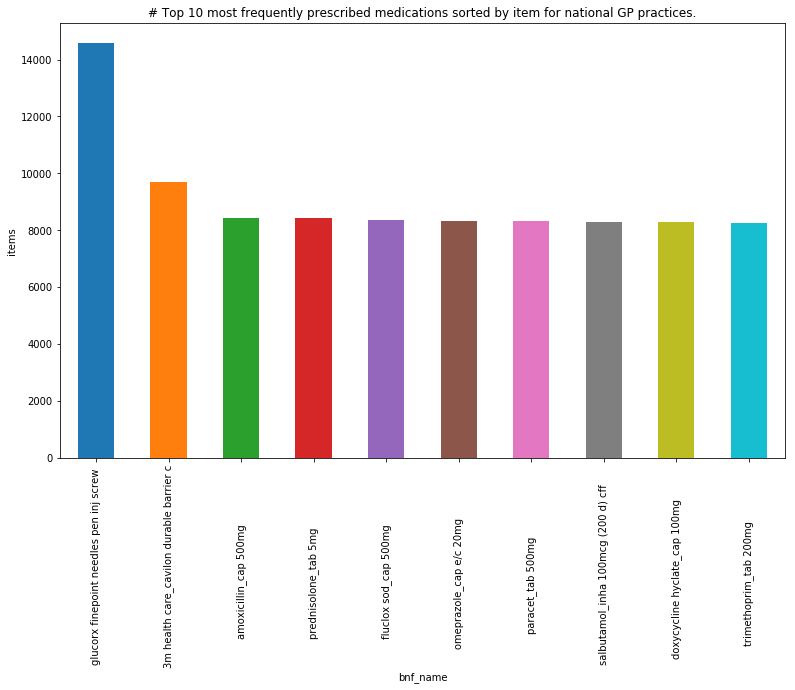

In [26]:
# Plot of the top 10 most frequently prescribed medications by item for national GP practices.
ax=df_national_prescriptions_item_top10[['bnf_name','items']].plot(kind='bar', x='bnf_name', y='items', title='# Top 10 most frequently prescribed medications sorted by item for national GP practices.', figsize=(8,6),legend=False, fontsize=10)
ax.set_xlabel("bnf_name",fontsize=10)
ax.set_ylabel("items",fontsize=10)
plt.gcf().set_size_inches(13,8)

In [27]:
# Bottom 10 least frequently prescribed medications by item for national GP practices.
df_national_prescriptions_item_bottom10 = df_national_prescriptions_tabulation.tail(10)
df_national_prescriptions_item_bottom10

,bnf_name,items
19065,gabapentin_gel 6%,1
19066,ga1 anamix junior_oral pdr sach 18g,1
19067,g/f_bread,1
19068,g/f /w/f_flour,1
19069,g/f /w/f_bisc,1
19070,silgel 15cm x 10cm wound dress slc gel s,1
19071,silgel 5cm diam wound dress slc gel shee,1
19072,g/f /l/p_bread,1
19073,furosemide_liq spec 8mg/5ml,1
19074,fludrocort acet_liq spec 25mcg/5ml,1


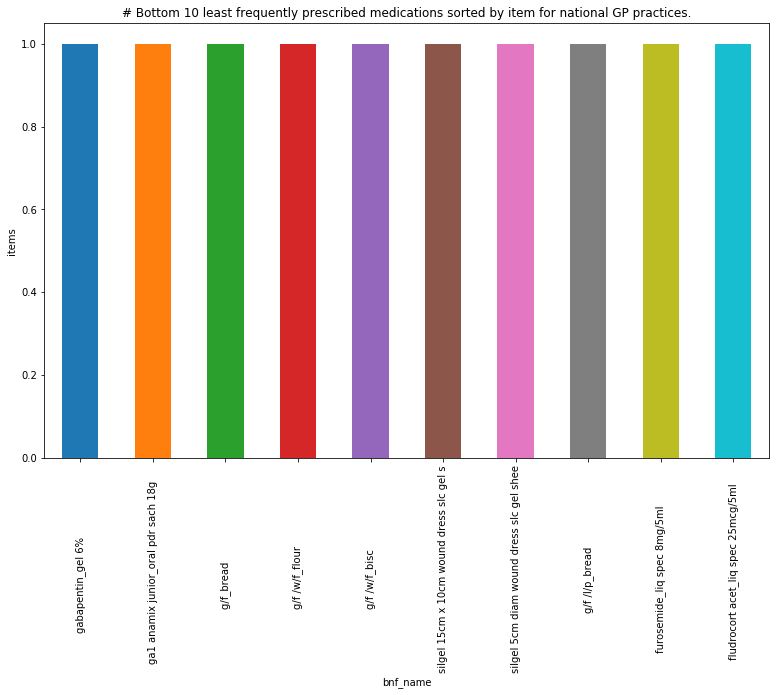

In [28]:
# Plot of the bottom 10 least frequently prescribed medications by item for national GP practices.
ax=df_national_prescriptions_item_bottom10[['bnf_name','items']].plot(kind='bar', x='bnf_name', y='items', title='# Bottom 10 least frequently prescribed medications sorted by item for national GP practices.', figsize=(8,6),legend=False, fontsize=10)
ax.set_xlabel("bnf_name",fontsize=10)
ax.set_ylabel("items",fontsize=10)
plt.gcf().set_size_inches(13,8)

In [29]:
# act_cost (£) for each national GP practices.
df_national_prescriptions_act = df_national['act_cost'].groupby(df_national['bnf_name']).sum()
df_national_prescriptions_act_cost = pd.DataFrame(df_national_prescriptions_act)
df_national_prescriptions_act_cost_tab = df_national_prescriptions_act_cost.sort_values(['act_cost'], ascending=0)
df_national_prescriptions_act_cost_tab = df_national_prescriptions_act_cost_tab.reset_index()

# The dataframe presents the first 100 national GP practices for representation purposes.
df_national_prescriptions_act_cost_tab.head(100)

,bnf_name,act_cost
0,tiotropium_pdr for inh cap 18mcg,11577355.75
1,rivaroxaban_tab 20mg,7219155.39
2,sitagliptin_tab 100mg,6341315.20
3,hydrocort_tab 10mg,5724630.86
4,paracet_tab 500mg,5722463.66
5,fluticasone/salmeterol_inh 250/25mcg120d,5391801.25
6,metformin hcl_tab 500mg,5145207.58
7,fostair_inh 100mcg/6mcg (120d) cff,5105120.50
8,symbicort_turbohaler 200mcg/6mcg (120 d),4862478.05
9,ins lantus solostar_100u/ml 3ml pf pen,4645014.67


In [30]:
# Top 10 most frequently prescribed medications and their act_cost (£) for all national GP practices.
df_national_cost_top10 = pd.merge(df_national_prescriptions_item_top10, df_national_prescriptions_act_cost_tab, on='bnf_name')

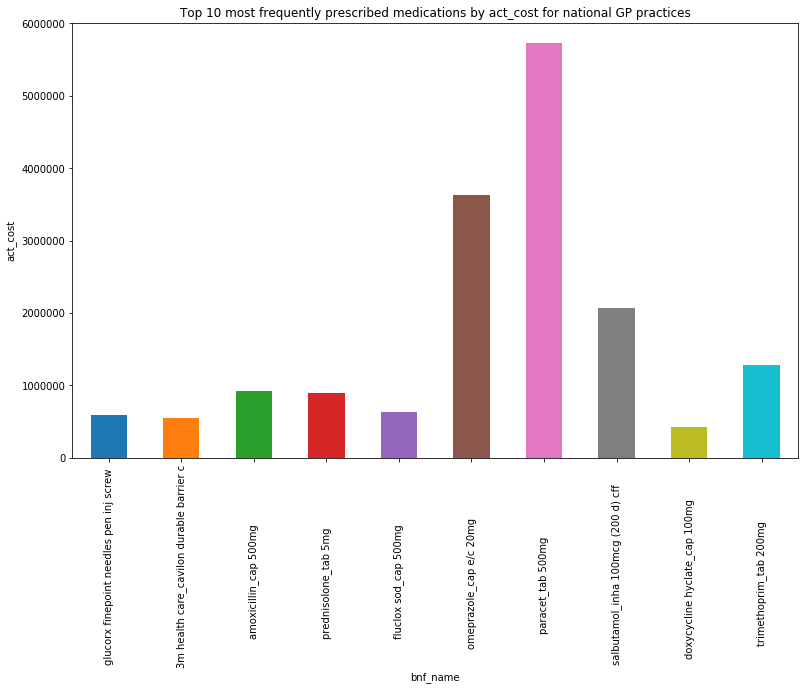

In [31]:
# Top 10 most frequently prescribed medications and their act_cost (£) for all national GP practices.
ax=df_national_cost_top10[['bnf_name','act_cost']].plot(kind='bar', x='bnf_name', y='act_cost', title='Top 10 most frequently prescribed medications by act_cost for national GP practices', figsize=(8,6),legend=False, fontsize=10)
ax.set_xlabel("bnf_name",fontsize=10)
ax.set_ylabel("act_cost",fontsize=10)
plt.gcf().set_size_inches(13,8)

In [32]:
# Bottom 10 least frequently prescribed medications and their act_cost (£) for all national GP practices.
df_national_cost_bottom10 = pd.merge(df_national_prescriptions_item_bottom10, df_national_prescriptions_act_cost_tab, on='bnf_name')
df_national_cost_bottom10

,bnf_name,items,act_cost
0,gabapentin_gel 6%,1,488.49
1,ga1 anamix junior_oral pdr sach 18g,1,218.04
2,g/f_bread,1,20.87
3,g/f /w/f_flour,1,2.10
4,g/f /w/f_bisc,1,3.88
5,silgel 15cm x 10cm wound dress slc gel s,1,36.09
6,silgel 5cm diam wound dress slc gel shee,1,3.71
7,g/f /l/p_bread,1,45.64
8,furosemide_liq spec 8mg/5ml,1,301.24
9,fludrocort acet_liq spec 25mcg/5ml,1,306.56


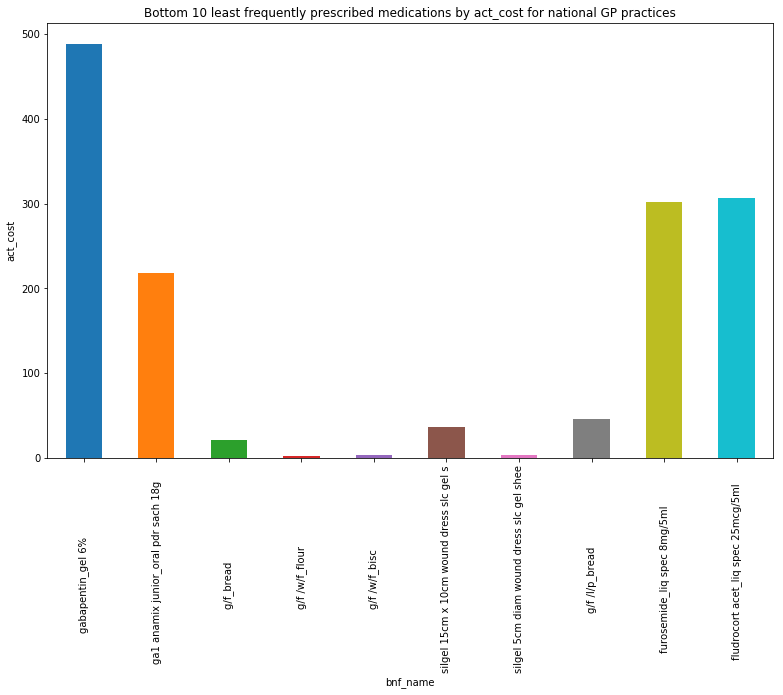

In [33]:
# Bottom 10 least frequently prescribed medications and their act_cost (£) for all national GP practices.
ax=df_national_cost_bottom10[['bnf_name','act_cost']].plot(kind='bar', x='bnf_name', y='act_cost', title='Bottom 10 least frequently prescribed medications by act_cost for national GP practices', figsize=(8,6),legend=False, fontsize=10)
ax.set_xlabel("bnf_name",fontsize=10)
ax.set_ylabel("act_cost",fontsize=10)
plt.gcf().set_size_inches(13,8)

In [34]:
#

### Prescription frequencies for Wolverhampton GP practices.

In [35]:
# Top 10 most frequently prescribed medications by item for Wolverhampton.
dfwol4_prescriptions_item_top10 = dfwol4_total_prescriptions_tabulation.head(10)
dfwol4_prescriptions_item_top10

,bnf_name,items
0,3m health care_cavilon durable barrier c,64
1,glucorx finepoint needles pen inj screw,59
2,salbutamol_inha 100mcg (200 d) cff,58
3,amoxicillin_cap 500mg,58
4,paracet_tab 500mg,57
5,fortisip bottle_liq (8 flav),56
6,doxycycline hyclate_cap 100mg,56
7,senna_tab 7.5mg,56
8,cetraben crm 500g,56
9,furosemide_tab 40mg,56


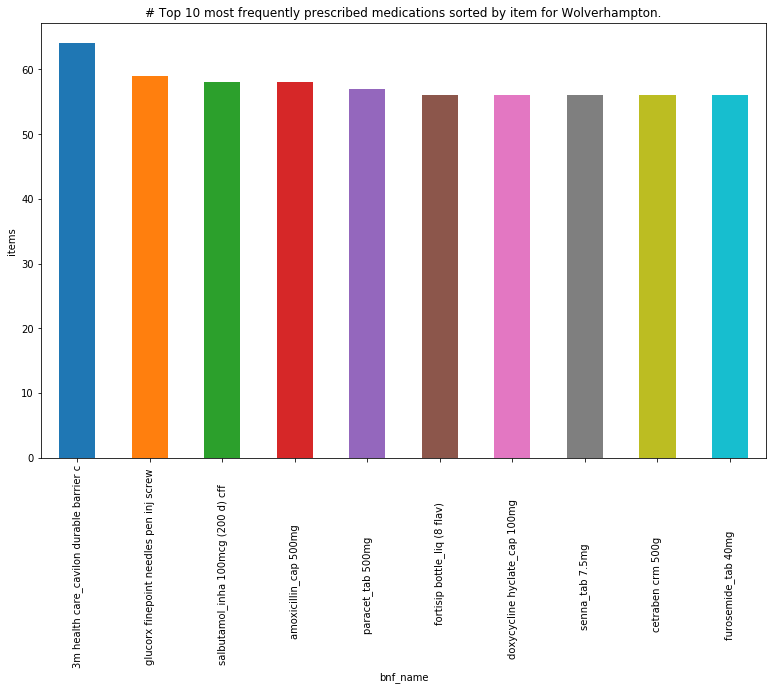

In [36]:
# Plot of the top 10 most frequently prescribed medications for Wolverhampton.
ax=dfwol4_prescriptions_item_top10[['bnf_name','items']].plot(kind='bar', x='bnf_name', y='items', title='# Top 10 most frequently prescribed medications sorted by item for Wolverhampton.', figsize=(8,6),legend=False, fontsize=10)
ax.set_xlabel("bnf_name",fontsize=10)
ax.set_ylabel("items",fontsize=10)
plt.gcf().set_size_inches(13,8)

In [37]:
# Bottom 10 least frequently prescribed medications by item for Wolverhampton.
dfwol4_prescriptions_item_bottom10 = dfwol4_total_prescriptions_tabulation.tail(10)
dfwol4_prescriptions_item_bottom10

,bnf_name,items
6590,fresenius sod chlor top irrig 0.9% 1l,1
6591,fresubin energy fibre_liq (6 flav),1
6592,fresubin energy_liq (unflav),1
6593,fresubin jucy_drink (5 flav),1
6594,fresubin orig_liq (5 flav),1
6595,frusol_oral soln 20mg/5ml s/f,1
6596,full marks soln,1
6597,fybogel_h/fbre gran eff sach3.5g lem s/f,1
6598,prednisolone_oral soln 5mg/5ml ud,1
6599,zyprexa_velotab 5mg,1


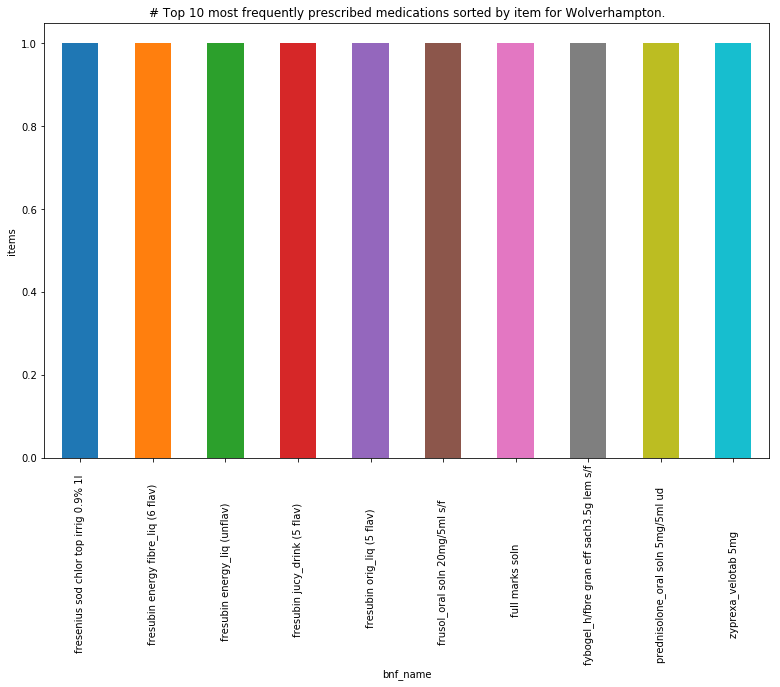

In [38]:
# Plot of the bottom 10 least frequently prescribed medications for Wolverhampton.
ax=dfwol4_prescriptions_item_bottom10[['bnf_name','items']].plot(kind='bar', x='bnf_name', y='items', title='# Top 10 most frequently prescribed medications sorted by item for Wolverhampton.', figsize=(8,6),legend=False, fontsize=10)
ax.set_xlabel("bnf_name",fontsize=10)
ax.set_ylabel("items",fontsize=10)
plt.gcf().set_size_inches(13,8)

In [39]:
# act_cost (£) for medications in Wolverhampton.
dfwol4_prescriptions_act = dfwol4['act_cost'].groupby(dfwol4['bnf_name']).sum()
dfwol4_prescriptions_act_cost = pd.DataFrame(dfwol4_prescriptions_act).reset_index()
dfwol4_prescriptions_act_cost_tab = dfwol4_prescriptions_act_cost.sort_values(['act_cost'], ascending=0)
dfwol4_prescriptions_act_cost_tab = dfwol4_prescriptions_act_cost_tab
dfwol4_prescriptions_act_cost_tab.head(10)

,bnf_name,act_cost
3638,liraglutide_inj 6mg/ml 3ml pf pen,76874.90
2578,fluticasone/salmeterol_inh 250/25mcg120d,61607.32
5343,rivaroxaban_tab 20mg,49279.88
6036,tiotropium_pdr for inh cap 18mcg,49020.27
2622,fortisip bottle_liq (8 flav),47356.67
5633,sitagliptin_tab 100mg,46601.53
3212,ins novomix 30_flexpen 100u/ml 3ml pfpen,42987.95
1282,co-codamol_tab 30mg/500mg,31403.74
2400,ezetimibe_tab 10mg,29877.64
5544,seretide 250_evohaler 250mcg/25mcg(120d),29373.54


In [40]:
dfwol4_prescriptions_act_cost_tab.shape

(6600, 2)

In [41]:
# Top 10 most frequently prescribed medications and their act_cost (£) for Wolverhampton GP practices.
dfwol4_cost_top10 = pd.merge(dfwol4_prescriptions_item_top10, dfwol4_prescriptions_act_cost_tab, on='bnf_name')
dfwol4_cost_top10

,bnf_name,items,act_cost
0,3m health care_cavilon durable barrier c,64,3651.90
1,glucorx finepoint needles pen inj screw,59,1532.48
2,salbutamol_inha 100mcg (200 d) cff,58,16942.09
3,amoxicillin_cap 500mg,58,5953.57
4,paracet_tab 500mg,57,24660.81
5,fortisip bottle_liq (8 flav),56,47356.67
6,doxycycline hyclate_cap 100mg,56,2287.57
7,senna_tab 7.5mg,56,3980.19
8,cetraben crm 500g,56,5712.06
9,furosemide_tab 40mg,56,5995.43


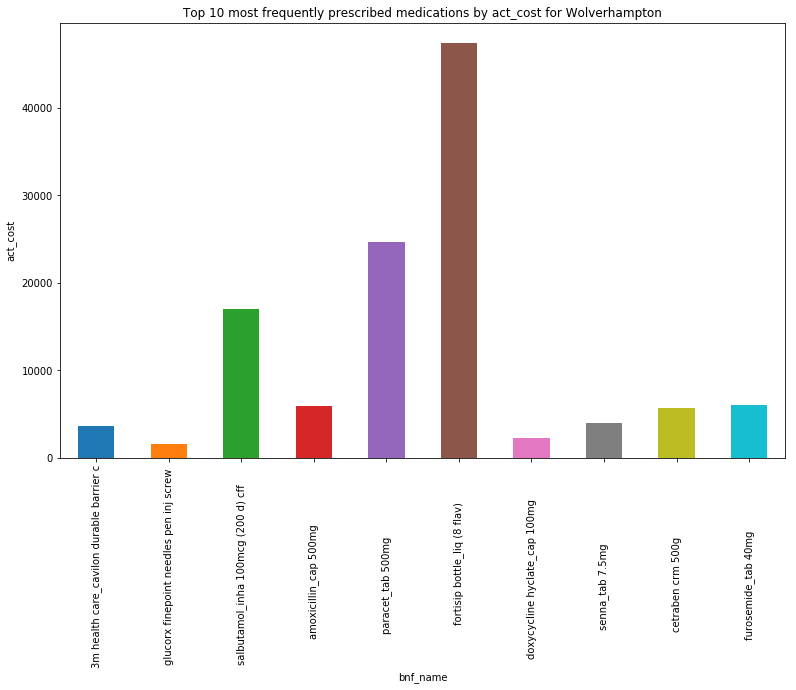

In [42]:
# Plot of top 10 most frequently prescribed medications and their act_cost (£) for Wolverhampton GP practices.
ax=dfwol4_cost_top10[['bnf_name','act_cost']].plot(kind='bar', x='bnf_name', y='act_cost', title='Top 10 most frequently prescribed medications by act_cost for Wolverhampton', figsize=(8,6),legend=False, fontsize=10)
ax.set_xlabel("bnf_name",fontsize=10)
ax.set_ylabel("act_cost",fontsize=10)
plt.gcf().set_size_inches(13,8)

In [43]:
# Bottom 10 least frequently prescribed medications and their act_cost (£) for Wolverhampton GP practices.
dfwol4_cost_bottom10 = pd.merge(dfwol4_prescriptions_item_bottom10, dfwol4_prescriptions_act_cost_tab, on='bnf_name')
dfwol4_cost_bottom10

,bnf_name,items,act_cost
0,fresenius sod chlor top irrig 0.9% 1l,1,2.69
1,fresubin energy fibre_liq (6 flav),1,18.78
2,fresubin energy_liq (unflav),1,130.76
3,fresubin jucy_drink (5 flav),1,35.70
4,fresubin orig_liq (5 flav),1,54.90
5,frusol_oral soln 20mg/5ml s/f,1,22.34
6,full marks soln,1,6.44
7,fybogel_h/fbre gran eff sach3.5g lem s/f,1,1.81
8,prednisolone_oral soln 5mg/5ml ud,1,63.31
9,zyprexa_velotab 5mg,1,44.46


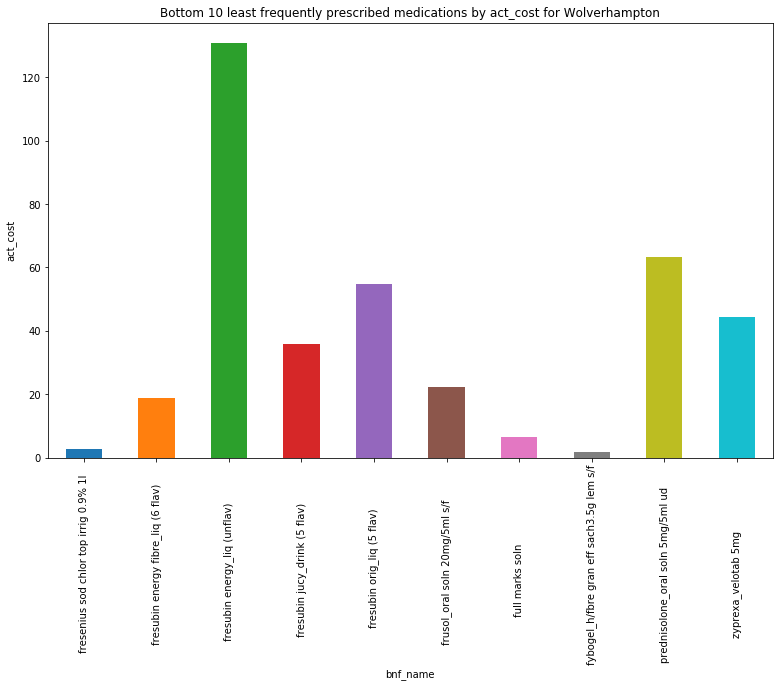

In [44]:
# Plot of bottom 10 least frequently prescribed medications and their act_cost (£) for Wolverhampton GP practices.
ax=dfwol4_cost_bottom10[['bnf_name','act_cost']].plot(kind='bar', x='bnf_name', y='act_cost', title='Bottom 10 least frequently prescribed medications by act_cost for Wolverhampton', figsize=(8,6),legend=False, fontsize=10)
ax.set_xlabel("bnf_name",fontsize=10)
ax.set_ylabel("act_cost",fontsize=10)
plt.gcf().set_size_inches(13,8)

In [45]:
# Total act_cost (£) for top 10 most frequently prescribed medications for Wolverhampton GP practices.
dfwol4_cost_top10_sum = dfwol4_cost_top10.agg({'act_cost' : [np.sum]})
dfwol4_cost_top10_sum

,act_cost
sum,118072.77


In [46]:
# Total act_cost (£) for bottom 10 least frequently prescribed medications for Wolverhampton GP practices.
dfwol4_cost_bottom10_sum = dfwol4_cost_bottom10.agg({'act_cost' : [np.sum]})
dfwol4_cost_bottom10_sum

,act_cost
sum,381.19


In [47]:
# Wolverhampton; The overall actual costs (£) of the entire city
dfwol4_prescriptions_act_cost_sum = dfwol4_prescriptions_act_cost_tab.agg({'act_cost' : [np.sum]})
dfwol4_prescriptions_act_cost_sum.head(10)

,act_cost
sum,4559508.42


In [48]:
#

In [49]:
#

## 3/. Find the top ten most expensive medications and calculate their total actual cost.

In [50]:
# Top 10 most expensive medications and their per_item_cost tabulated for Wolverhampton.
dfwol4 = dfwol4.assign(per_item_cost = dfwol4['act_cost']/dfwol4['items'])
dfwol4_per_item_cost = pd.DataFrame()
dfwol4_per_item_cost = dfwol4[['practice', 'bnf_name', 'items', 'act_cost', 'per_item_cost']]
dfwol4_per_item_cost_sort = dfwol4_per_item_cost.sort_values(by='per_item_cost', ascending=0).round(2)
dfwol4_pic_sort_top10 = dfwol4_per_item_cost_sort.head(10)
dfwol4_pic_sort_top10

,practice,bnf_name,items,act_cost,per_item_cost
552,m82021,ondansetron hcl_inj 2mg/ml 4ml amp,1,2217.32,2217.32
55572,m92002,sucralfate_enem 2g in 20ml,1,1906.92,1906.92
28240,m92028,mepilex border 17cm x 20cm wound dress s,5,8867.99,1773.60
15311,m92009,oxandrolone_tab 2.5mg,3,5064.81,1688.27
58096,m92019,glycopyrronium brom_tab 2mg,1,1618.15,1618.15
35352,m92041,ethinylestr_tab 50mcg,1,1479.45,1479.45
14507,m92009,phenindione_tab 10mg,1,1442.41,1442.41
36637,m92042,jade_bag plas scwcap adult,1,1256.61,1256.61
22539,m92013,fidaxomicin_tab 200mg,1,1248.29,1248.29
59956,m92022,doxepin_cap 50mg,2,2441.30,1220.65


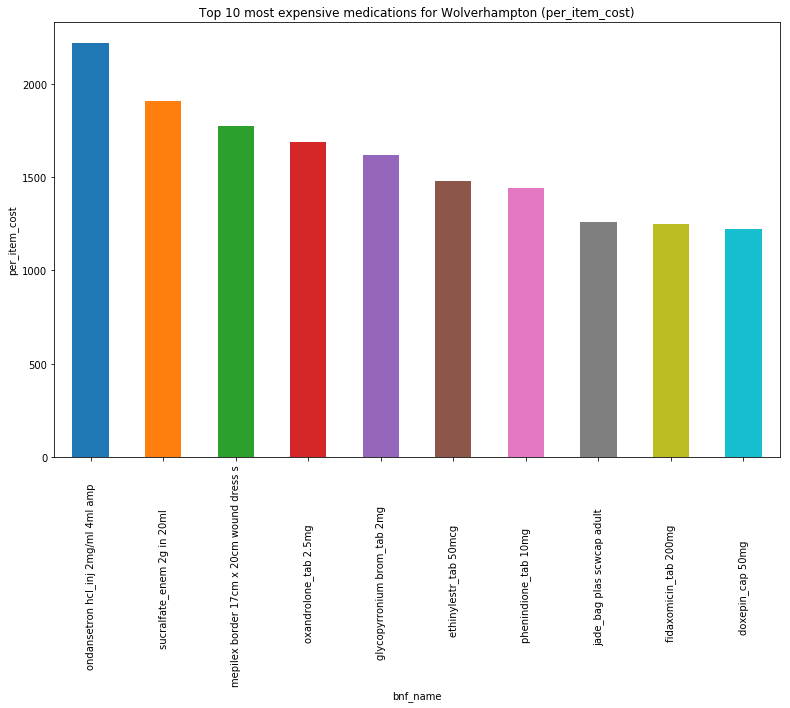

In [51]:
# Plot of the top 10 most expensive medications and their per_item_cost tabulated for Wolverhampton.
ax=dfwol4_pic_sort_top10[['bnf_name','per_item_cost']].plot(kind='bar', x='bnf_name', y='per_item_cost', title='Top 10 most expensive medications for Wolverhampton (per_item_cost)', figsize=(8,6),legend=False, fontsize=10)
ax.set_xlabel("bnf_name",fontsize=10)
ax.set_ylabel("per_item_cost",fontsize=10)
plt.gcf().set_size_inches(13,8)

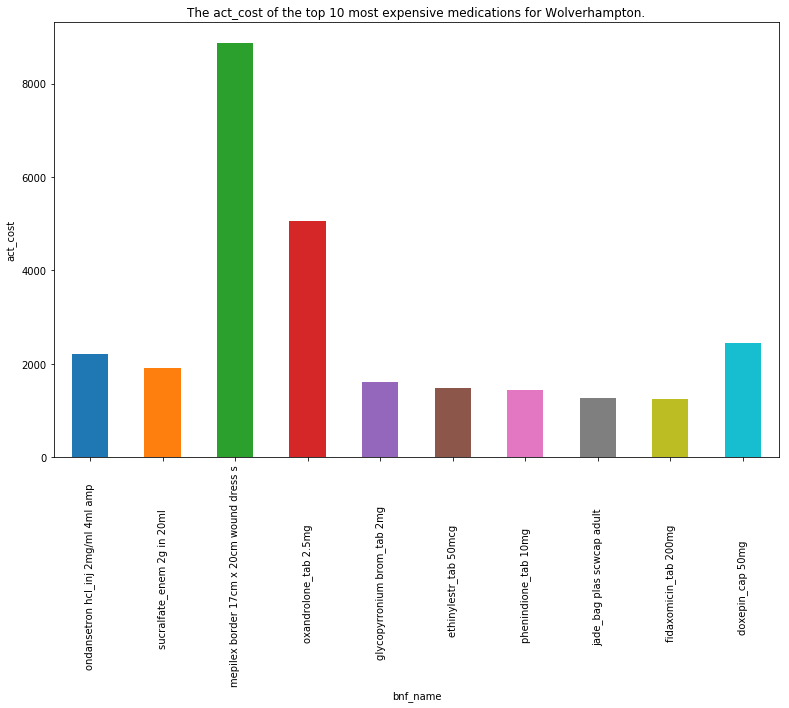

In [52]:
# Plot of the act_cost of the top 10 most expensive medications for Wolverhampton.
ax=dfwol4_pic_sort_top10[['bnf_name','act_cost']].plot(kind='bar', x='bnf_name', y='act_cost', title='The act_cost of the top 10 most expensive medications for Wolverhampton.', figsize=(8,6),legend=False, fontsize=10)
ax.set_xlabel("bnf_name",fontsize=10)
ax.set_ylabel("act_cost",fontsize=10)
plt.gcf().set_size_inches(13,8)

In [53]:
# Total actual cost for the top 10 most expensive medications (£) for Wolverhampton.
dfwol4_top10exp_per_item_cost = sum(dfwol4_pic_sort_top10['per_item_cost'])
dfwol4_top10exp_per_item_cost

15851.67

In [54]:
#

In [55]:
#

## 4/. How does prescribing (frequency and costs) in your city compare when using prescribing data from Cambridge as a reference?

In [56]:
# A tabulation of the GP Practices in Cambridge (dfcam).
dfcam1 = gp_practices[gp_practices['address3'].map(lambda address3: 'cambri' in address3)]
dfcam2 = gp_practices[gp_practices['address4'].map(lambda address4: 'cambridge ' in address4)]
dfcam3 = pd.concat([dfcam1, dfcam2])
pd.set_option('display.max_rows', 40)
dfcam3

,yearmonth,practice,name,address1,address2,address3,address4,postcode
1534,201512,d81001,lensfield medical practice,lensfield medical prac.,48 lensfield road,cambridge,cambridgeshire,cb2 1eh
1535,201512,d81002,huntingdon road surgery,huntingdon road surgery,1 huntingdon road,cambridge,,cb3 0db
1536,201512,d81003,york street medical practice,york street med pract.,146-148 york street,cambridge,camridgeshire,cb1 2py
1538,201512,d81005,newnham walk surgery,newnham walk surgery,wordsworth grove,cambridge,cambridgeshire,cb3 9hs
1541,201512,d81009,shelford medical practice,shelford medical practice,ashen green grt shelford,cambridge,,cb22 5fy
1544,201512,d81012,cornford house surgery,cornford house surgery,364 cherry hinton road,cambridge,cambridgeshire,cb1 8ba
1545,201512,d81013,trumpington street medical practice,trumpington st.med.ctr.,56 trumpington street,cambridge,cambridgeshire,cb2 1rg
1548,201512,d81016,arbury road surgery,arbury road surgery,114 arbury road,cambridge,cambridgeshire,cb4 2jg
1549,201512,d81017,mill road surgery,279-281 mill road,,cambridge,cambridgeshire,cb1 3dg
1560,201512,d81028,firs house surgery,firs house surgery,station road histon,cambridge,,cb24 9np


In [57]:
dfcam3.shape

(36, 8)

In [58]:
# Merge of the 36 GP practices in Cambridge and their associated prescriptions.
dfcam4 = pd.merge(dfcam3, gp_prescriptions, on='practice')
dfcam4

,yearmonth,practice,name,address1,address2,address3,address4,postcode,sha,pct,bnf_code,bnf_name,items,nic,act_cost,quantity,period
0,201512,d81001,lensfield medical practice,lensfield medical prac.,48 lensfield road,cambridge,cambridgeshire,cb2 1eh,q56,06h,0101021b0aaahah,alginate_raft-forming oral susp s/f,5,9.99,9.31,2050,201512
1,201512,d81001,lensfield medical practice,lensfield medical prac.,48 lensfield road,cambridge,cambridgeshire,cb2 1eh,q56,06h,0101021b0aaalal,sod algin/pot bicarb_susp s/f,5,35.23,33.05,3440,201512
2,201512,d81001,lensfield medical practice,lensfield medical prac.,48 lensfield road,cambridge,cambridgeshire,cb2 1eh,q56,06h,0101021b0beacah,gaviscon_liq orig aniseed relief,2,14.43,13.47,1150,201512
3,201512,d81001,lensfield medical practice,lensfield medical prac.,48 lensfield road,cambridge,cambridgeshire,cb2 1eh,q56,06h,0101021b0beafah,gaviscon_liq relief peppermint,1,7.11,6.59,600,201512
4,201512,d81001,lensfield medical practice,lensfield medical prac.,48 lensfield road,cambridge,cambridgeshire,cb2 1eh,q56,06h,0101021b0beaial,gaviscon advance_liq (aniseed) (reckitt),2,10.24,9.50,1000,201512
5,201512,d81001,lensfield medical practice,lensfield medical prac.,48 lensfield road,cambridge,cambridgeshire,cb2 1eh,q56,06h,0101021b0beaua0,gaviscon p/mint_tab chble,1,19.46,18.01,224,201512
6,201512,d81001,lensfield medical practice,lensfield medical prac.,48 lensfield road,cambridge,cambridgeshire,cb2 1eh,q56,06h,0101021b0bebeal,gaviscon advance_liq (peppermint) s/f,4,54.0,49.98,4200,201512
7,201512,d81001,lensfield medical practice,lensfield medical prac.,48 lensfield road,cambridge,cambridgeshire,cb2 1eh,q56,06h,0101021b0biaaah,peptac_liq (aniseed) s/f,3,5.85,5.45,1500,201512
8,201512,d81001,lensfield medical practice,lensfield medical prac.,48 lensfield road,cambridge,cambridgeshire,cb2 1eh,q56,06h,0101021b0biabah,peptac_liq (peppermint) s/f,1,3.9,3.62,1000,201512
9,201512,d81001,lensfield medical practice,lensfield medical prac.,48 lensfield road,cambridge,cambridgeshire,cb2 1eh,q56,06h,0102000n0aaabab,hyoscine butylbrom_tab 10mg,2,15.0,13.90,280,201512


In [59]:
dfcam4.shape

(41728, 17)

In [60]:
#

### Prescriptions frequencies for Cambridge GP practices.

In [61]:
# Total number of prescribed items by medication name for Cambridge.
dfcam4_total_prescriptions = dfcam4['items'].groupby(dfcam4['bnf_name']).count()
dfcam4_total_prescriptions_tab = pd.DataFrame(dfcam4_total_prescriptions)
dfcam4_total_prescriptions_tabulation = dfcam4_total_prescriptions_tab.sort_values(['items'], ascending=0)
dfcam4_total_prescriptions_tabulation = dfcam4_total_prescriptions_tabulation.reset_index()
dfcam4_total_prescriptions_tabulation.head(10)

,bnf_name,items
0,glucorx finepoint needles pen inj screw,89
1,3m health care_cavilon durable barrier c,67
2,amitriptyline hcl_tab 10mg,36
3,prednisolone_tab 5mg,35
4,naproxen_tab 250mg,34
5,codeine phos_tab 30mg,34
6,phenoxymethylpenicillin pot_tab 250mg,34
7,diazepam_tab 2mg,34
8,diazepam_tab 5mg,34
9,co-codamol_cap 30mg/500mg,34


In [62]:
# Top 10 most frequently prescribed medications by item for Cambridge.
dfcam4_prescriptions_item_top10 = dfcam4_total_prescriptions_tabulation.head(10)
dfcam4_prescriptions_item_top10

,bnf_name,items
0,glucorx finepoint needles pen inj screw,89
1,3m health care_cavilon durable barrier c,67
2,amitriptyline hcl_tab 10mg,36
3,prednisolone_tab 5mg,35
4,naproxen_tab 250mg,34
5,codeine phos_tab 30mg,34
6,phenoxymethylpenicillin pot_tab 250mg,34
7,diazepam_tab 2mg,34
8,diazepam_tab 5mg,34
9,co-codamol_cap 30mg/500mg,34


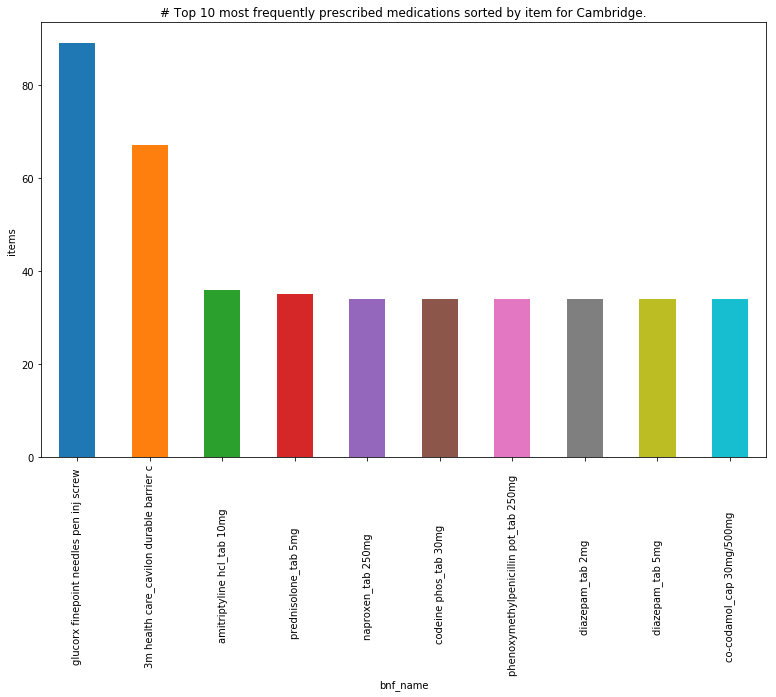

In [63]:
# Plot of the top 10 most frequently prescribed medications for Cambridge.
ax=dfcam4_prescriptions_item_top10[['bnf_name','items']].plot(kind='bar', x='bnf_name', y='items', title='# Top 10 most frequently prescribed medications sorted by item for Cambridge.', figsize=(8,6),legend=False, fontsize=10)
ax.set_xlabel("bnf_name",fontsize=10)
ax.set_ylabel("items",fontsize=10)
plt.gcf().set_size_inches(13,8)

In [64]:
# Bottom 10 least frequently prescribed medications by item for Cambridge.
dfcam4_prescriptions_item_bottom10 = dfcam4_total_prescriptions_tabulation.tail(10)
dfcam4_prescriptions_item_bottom10

,bnf_name,items
5482,ostomart_ostoseal prote pdr,1
5483,ostomart_ostopeel blackberry no sting me,1
5484,durogesic dtrans_t/derm patch 100mcg,1
5485,ostomart_ostomist mint p/spy 50ml,1
5486,ostomart_ostomist mint p/spy 100ml,1
5487,ostomart_ostomist cinnamon & sandalwood,1
5488,ostomart_ostomist apple p/spy 100ml,1
5489,ostomart_ostoguard no sting barrier film,1
5490,durogesic dtrans_t/derm patch 75mcg,1
5491,zyprexa_velotab 15mg,1


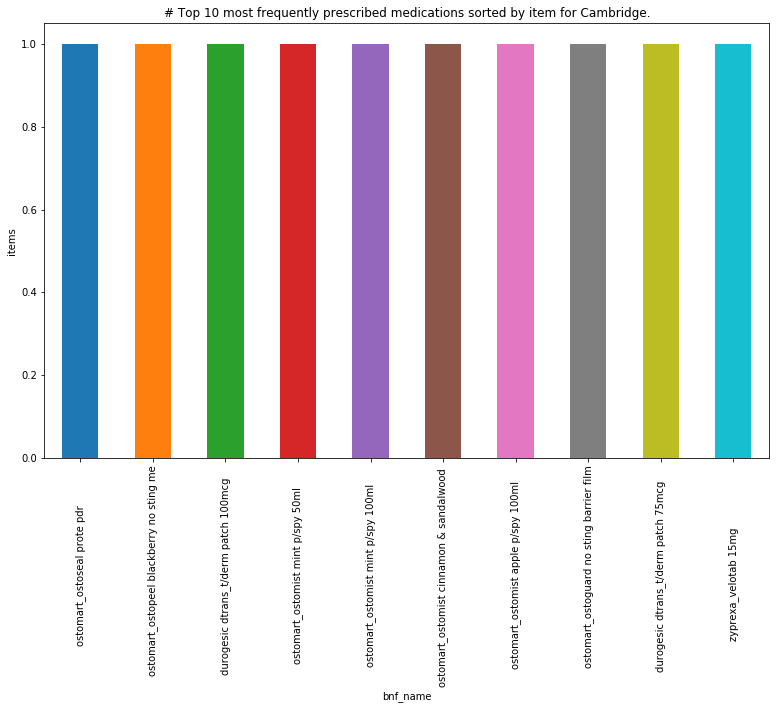

In [65]:
# Plot of the bottom 10 least frequently prescribed medications for Cambridge.
ax=dfcam4_prescriptions_item_bottom10[['bnf_name','items']].plot(kind='bar', x='bnf_name', y='items', title='# Top 10 most frequently prescribed medications sorted by item for Cambridge.', figsize=(8,6),legend=False, fontsize=10)
ax.set_xlabel("bnf_name",fontsize=10)
ax.set_ylabel("items",fontsize=10)
plt.gcf().set_size_inches(13,8)

In [66]:
# act_cost (£) for medications in Cambridge.
dfcam4_prescriptions_act = dfcam4['act_cost'].groupby(dfcam4['bnf_name']).sum()
dfcam4_prescriptions_act_cost = pd.DataFrame(dfcam4_prescriptions_act).reset_index()
dfcam4_prescriptions_act_cost_tab = dfcam4_prescriptions_act_cost.sort_values(['act_cost'], ascending=0)
dfcam4_prescriptions_act_cost_tab = dfcam4_prescriptions_act_cost_tab
dfcam4_prescriptions_act_cost_tab.head(10)

,bnf_name,act_cost
5011,tiotropium_pdr for inh cap 18mcg,45274.33
2159,fostair_inh 100mcg/6mcg (120d) cff,42576.23
2504,hydrocort_tab 10mg,38340.46
4467,rivaroxaban_tab 20mg,27186.18
4861,symbicort_turbohaler 200mcg/6mcg (120 d),21543.03
3985,paracet_tab 500mg,19773.87
3807,omeprazole_cap e/c 20mg,18280.24
2664,ins novorapid_flexpen 100u/ml 3ml pf pen,17502.55
3300,metformin hcl_tab 500mg,16566.13
2955,levothyrox sod_tab 25mcg,14925.85


In [67]:
dfcam4_prescriptions_act_cost_tab.shape

(5492, 2)

In [68]:
# Top 10 most frequently prescribed medications and their act_cost (£) for Cambridge GP practices.
dfcam4_cost_top10 = pd.merge(dfcam4_prescriptions_item_top10, dfcam4_prescriptions_act_cost_tab, on='bnf_name')
dfcam4_cost_top10

,bnf_name,items,act_cost
0,glucorx finepoint needles pen inj screw,89,3868.25
1,3m health care_cavilon durable barrier c,67,3884.28
2,amitriptyline hcl_tab 10mg,36,5972.72
3,prednisolone_tab 5mg,35,4056.17
4,naproxen_tab 250mg,34,2051.48
5,codeine phos_tab 30mg,34,4055.82
6,phenoxymethylpenicillin pot_tab 250mg,34,1638.75
7,diazepam_tab 2mg,34,1085.01
8,diazepam_tab 5mg,34,776.74
9,co-codamol_cap 30mg/500mg,34,3212.18


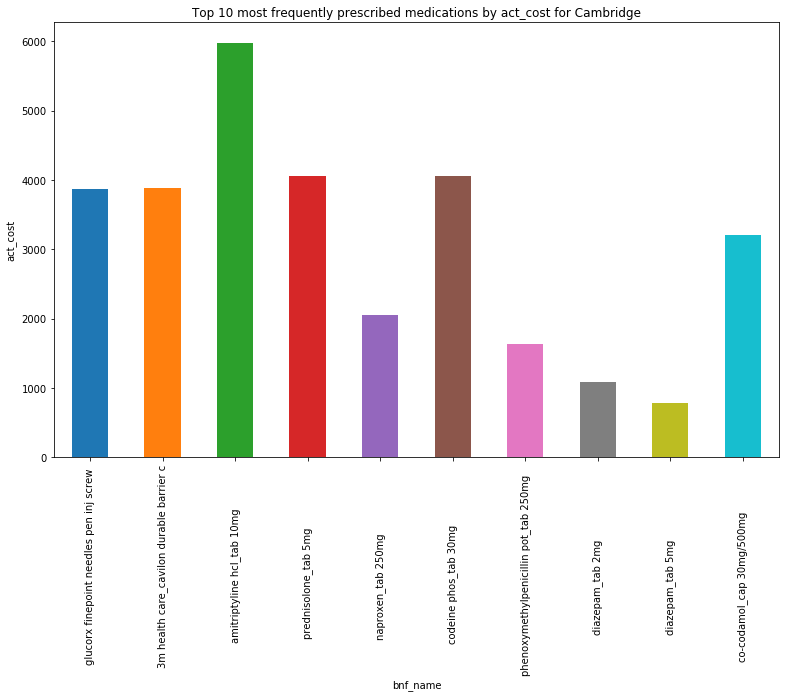

In [69]:
# Plot of top 10 most frequently prescribed medications and their act_cost (£) for Cambridge GP practices.
ax=dfcam4_cost_top10[['bnf_name','act_cost']].plot(kind='bar', x='bnf_name', y='act_cost', title='Top 10 most frequently prescribed medications by act_cost for Cambridge', figsize=(8,6),legend=False, fontsize=10)
ax.set_xlabel("bnf_name",fontsize=10)
ax.set_ylabel("act_cost",fontsize=10)
plt.gcf().set_size_inches(13,8)

In [70]:
# Bottom 10 least frequently prescribed medications and their act_cost (£) for Cambridge GP practices.
dfcam4_cost_bottom10 = pd.merge(dfcam4_prescriptions_item_bottom10, dfcam4_prescriptions_act_cost_tab, on='bnf_name')
dfcam4_cost_bottom10

,bnf_name,items,act_cost
0,ostomart_ostoseal prote pdr,1,2.24
1,ostomart_ostopeel blackberry no sting me,1,12.00
2,durogesic dtrans_t/derm patch 100mcg,1,107.00
3,ostomart_ostomist mint p/spy 50ml,1,3.79
4,ostomart_ostomist mint p/spy 100ml,1,7.37
5,ostomart_ostomist cinnamon & sandalwood,1,7.37
6,ostomart_ostomist apple p/spy 100ml,1,7.38
7,ostomart_ostoguard no sting barrier film,1,9.76
8,durogesic dtrans_t/derm patch 75mcg,1,173.82
9,zyprexa_velotab 15mg,1,77.93


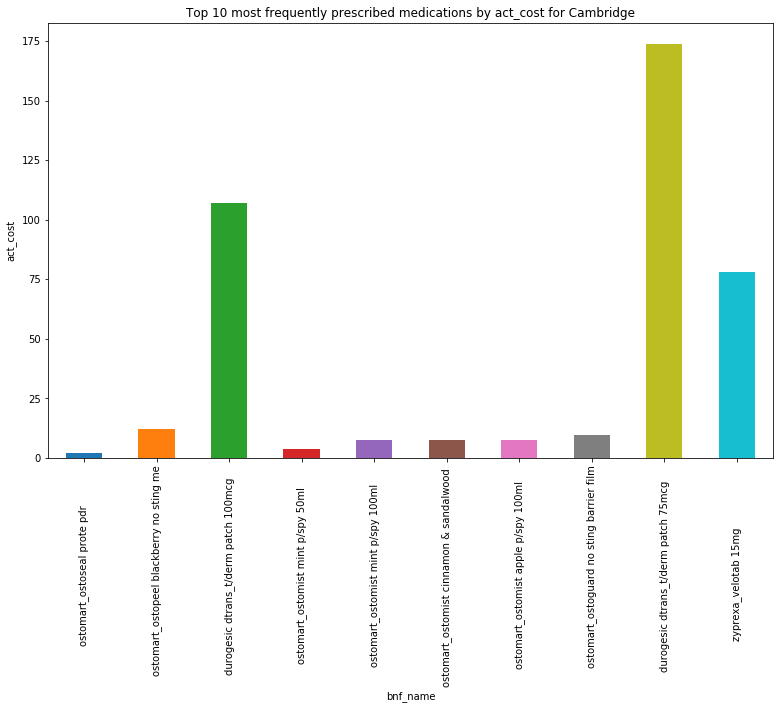

In [71]:
# Plot of bottom 10 least frequently prescribed medications and their act_cost (£) for Cambridge GP practices.
ax=dfcam4_cost_bottom10[['bnf_name','act_cost']].plot(kind='bar', x='bnf_name', y='act_cost', title='Top 10 most frequently prescribed medications by act_cost for Cambridge', figsize=(8,6),legend=False, fontsize=10)
ax.set_xlabel("bnf_name",fontsize=10)
ax.set_ylabel("act_cost",fontsize=10)
plt.gcf().set_size_inches(13,8)

In [72]:
# Total act_cost for top 10 most frequently prescribed medications by act_cost (£) for Cambridge GP practices.
dfcam4_cost_top10_sum = dfcam4_cost_top10.agg({'act_cost' : [np.sum]})
dfcam4_cost_top10_sum

,act_cost
sum,30601.4


In [73]:
# Total act_cost for bottom 10 least frequently prescribed medications by act_cost (£) for Cambridge GP practices.
dfcam4_cost_bottom10_sum = dfcam4_cost_bottom10.agg({'act_cost' : [np.sum]})
dfcam4_cost_bottom10_sum

,act_cost
sum,408.66


In [74]:
# Cambridge; The overall actual costs (£) of the entire city
dfcam4_prescriptions_act_cost_sum = dfcam4_prescriptions_act_cost_tab.agg({'act_cost' : [np.sum]})
dfcam4_prescriptions_act_cost_sum.head(10)

,act_cost
sum,2717047.69


### Top and bottom 10 expensive medications for Cambridge

In [75]:
# Top 10 most expensive medications and their per_item_cost tabulated for Cambridge.
dfcam4 = dfcam4.assign(per_item_cost = dfcam4['act_cost']/dfcam4['items'])
dfcam4_per_item_cost = pd.DataFrame()
dfcam4_per_item_cost = dfcam4[['practice', 'bnf_name', 'items', 'act_cost', 'per_item_cost']]
dfcam4_per_item_cost_sort = dfcam4_per_item_cost.sort_values(by='per_item_cost', ascending=0).round(2)
dfcam4_pic_sort_top10 = dfcam4_per_item_cost_sort.head(10)
dfcam4_pic_sort_top10

,practice,bnf_name,items,act_cost,per_item_cost
17131,d81037,liothyronine sod_tab 20mcg,1,2623.74,2623.74
22489,d81044,apo-go pfs_inf 5mg/ml 10ml pfs,1,2433.65,2433.65
14691,d81033,norditropin simplexx_inj 45u 15mg/1.5ml,1,1770.07,1770.07
2673,d81002,tretinoin_crm 0.025%,1,1468.21,1468.21
5370,d81005,unspec drug code_(discount not deducted),1,1465.58,1465.58
22750,d81044,saizen_inj 20mg/2.5ml cart,1,1286.01,1286.01
13185,d81028,famciclovir_tab 250mg,2,2249.71,1124.86
10725,d81016,norditropin simplexx_inj 15u 5mg/1.5ml,1,1081.71,1081.71
37265,d81086,elemental 028 ex_pdr sach 100g (3 flav),1,1056.33,1056.33
13136,d81028,demeclocycline hcl_tab 150mg,1,1038.45,1038.45


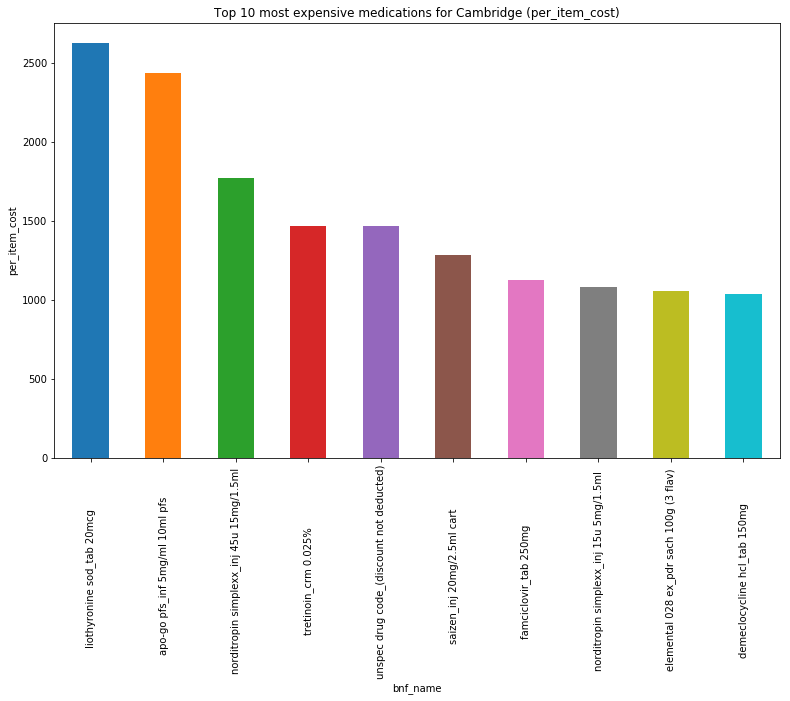

In [76]:
# Plot of the top 10 most expensive medications and their per_item_cost tabulated for Cambridge.
ax=dfcam4_pic_sort_top10[['bnf_name','per_item_cost']].plot(kind='bar', x='bnf_name', y='per_item_cost', title='Top 10 most expensive medications for Cambridge (per_item_cost)', figsize=(8,6),legend=False, fontsize=10)
ax.set_xlabel("bnf_name",fontsize=10)
ax.set_ylabel("per_item_cost",fontsize=10)
plt.gcf().set_size_inches(13,8)

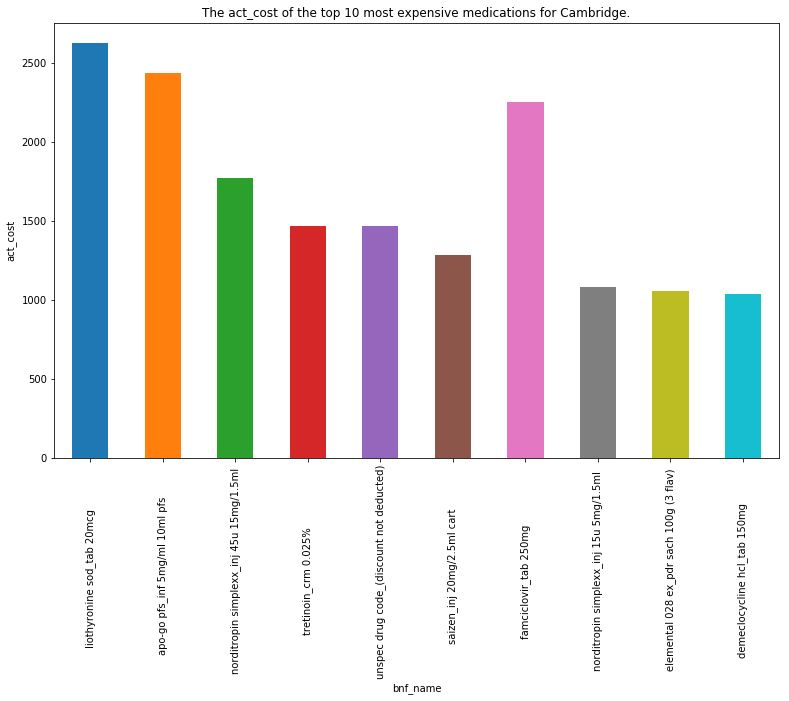

In [77]:
# Plot of the act_cost of the top 10 most expensive medications for Cambridge.
ax=dfcam4_pic_sort_top10[['bnf_name','act_cost']].plot(kind='bar', x='bnf_name', y='act_cost', title='The act_cost of the top 10 most expensive medications for Cambridge.', figsize=(8,6),legend=False, fontsize=10)
ax.set_xlabel("bnf_name",fontsize=10)
ax.set_ylabel("act_cost",fontsize=10)
plt.gcf().set_size_inches(13,8)

In [78]:
# Total actual cost for the top 10 most expensive medications (£) for Cambridge.
dfcam4_top10exp_per_item_cost = sum(dfcam4_pic_sort_top10['per_item_cost'])
dfcam4_top10exp_per_item_cost

15348.609999999999

In [79]:
#

### Comparison between the GP practices in Wolverhampton and Cambridge by prescription.

In [80]:
# Number of prescribed items by GP practices for Wolverhampton.
dfwol4_overall_practice_prescription = dfwol4['items'].groupby(dfwol4['practice'])
dfwol4_opp_tabulation_items = pd.DataFrame(dfwol4_overall_practice_prescription.sum())

# Overall actual prescription costs (£) by GP practices for Wolverhampton.
dfwol4_overall_practice_prescription = dfwol4['act_cost'].groupby(dfwol4['practice'])
dfwol4_opp_tabulation = pd.DataFrame(dfwol4_overall_practice_prescription.sum())

# Merge of total number of items and act_cost by practice for Wolverhampton.
dfwol4_items_act_cost = pd.merge(dfwol4_opp_tabulation, dfwol4_opp_tabulation_items, right_index=True, left_index=True)
dfwol4_items_act_cost = dfwol4_items_act_cost.reset_index()
dfwol4_items_act_cost

,practice,act_cost,items
0,m82021,152080.90,15744
1,m83018,105877.13,10934
2,m83031,98786.65,10281
3,m83093,92840.84,9299
4,m83097,110757.13,9565
5,m83125,67100.27,9874
6,m83132,67735.38,6439
7,m83668,55361.58,5331
8,m83715,60383.23,6363
9,m92001,52175.90,5928


In [81]:
dfwol4_items_act_cost.shape

(68, 3)

In [82]:
# Number of prescribed items by GP practices for Cambridge.
dfcam4_overall_practice_prescription = dfcam4['items'].groupby(dfcam4['practice'])
dfcam4_opp_tabulation_items = pd.DataFrame(dfcam4_overall_practice_prescription.sum())

# Overall actual prescription costs (£) by GP practices for Cambridge.
dfcam4_overall_practice_prescription = dfcam4['act_cost'].groupby(dfcam4['practice'])
dfcam4_opp_tabulation = pd.DataFrame(dfcam4_overall_practice_prescription.sum())

# Merge of total number of items and act_cost by practice for Cambridge.
dfcam4_items_act_cost = pd.merge(dfcam4_opp_tabulation, dfcam4_opp_tabulation_items, right_index=True, left_index=True)
dfcam4_items_act_cost = dfcam4_items_act_cost.reset_index()
dfcam4_items_act_cost

,practice,act_cost,items
0,d81001,74230.82,8233
1,d81002,121673.12,16532
2,d81003,101834.83,12858
3,d81005,70439.91,6450
4,d81009,85895.67,10787
5,d81012,114679.72,15425
6,d81013,84428.42,8916
7,d81016,113547.90,15211
8,d81017,47494.93,7556
9,d81025,109730.20,15562


In [83]:
dfcam4_items_act_cost.shape

(36, 3)

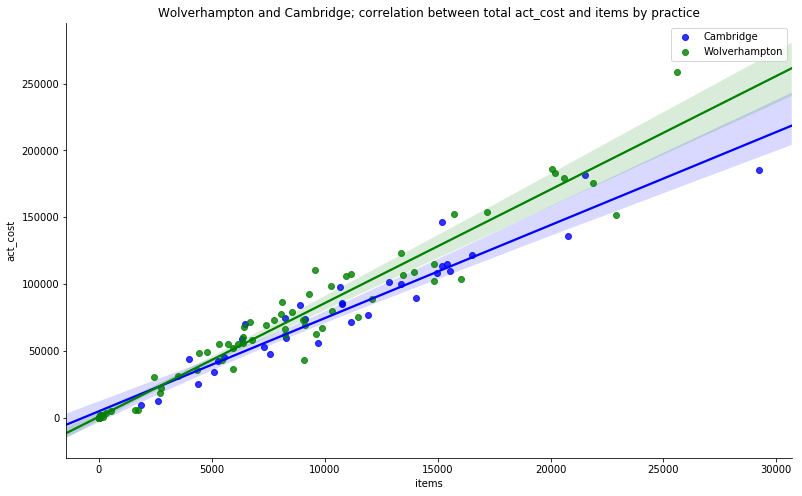

In [84]:
# Scatter plot and regression line for act_cost of items by GP practice in Cambridge.
f, ax = plt.subplots(figsize=(5, 6))
sns.regplot("items", "act_cost", data=dfcam4_items_act_cost, robust=True, label='Cambridge', ci=95, color="blue")
sns.regplot("items", "act_cost", data=dfwol4_items_act_cost, robust=True, label='Wolverhampton', ci=95, color="green")
sns.despine();
plt.title('Wolverhampton and Cambridge; correlation between total act_cost and items by practice')
legend = plt.legend()
plt.xlabel('items')
plt.ylabel('act_cost')
plt.gcf().set_size_inches(13,8)

In [85]:
#

### Comparison between Cambridge and Wolverhampton by medication.

In [86]:
# Merge of items and act_cost (£) for all Cambridge GP practices.
dfcam4_merged_all = pd.merge(dfcam4_total_prescriptions_tabulation, dfcam4_prescriptions_act_cost_tab, on='bnf_name')
dfcam4_merged_all = dfcam4_merged_all.sort_values(['act_cost'], ascending=0)
dfcam4_merged_all.head(10)

,bnf_name,items,act_cost
117,tiotropium_pdr for inh cap 18mcg,32,45274.33
48,fostair_inh 100mcg/6mcg (120d) cff,33,42576.23
175,hydrocort_tab 10mg,31,38340.46
140,rivaroxaban_tab 20mg,32,27186.18
201,symbicort_turbohaler 200mcg/6mcg (120 d),31,21543.03
78,paracet_tab 500mg,33,19773.87
81,omeprazole_cap e/c 20mg,33,18280.24
90,ins novorapid_flexpen 100u/ml 3ml pf pen,32,17502.55
57,metformin hcl_tab 500mg,33,16566.13
76,levothyrox sod_tab 25mcg,33,14925.85


In [87]:
# Merge of items and act_cost (£) for all Wolverhampton GP practices.
dfwol4_merged_all = pd.merge(dfwol4_total_prescriptions_tabulation, dfwol4_prescriptions_act_cost_tab, on='bnf_name')
dfwol4_merged_all = dfwol4_merged_all.sort_values(['act_cost'], ascending=0)
dfwol4_merged_all.head(10)

,bnf_name,items,act_cost
102,liraglutide_inj 6mg/ml 3ml pf pen,52,76874.90
255,fluticasone/salmeterol_inh 250/25mcg120d,48,61607.32
176,rivaroxaban_tab 20mg,51,49279.88
138,tiotropium_pdr for inh cap 18mcg,51,49020.27
5,fortisip bottle_liq (8 flav),56,47356.67
115,sitagliptin_tab 100mg,52,46601.53
50,ins novomix 30_flexpen 100u/ml 3ml pfpen,53,42987.95
22,co-codamol_tab 30mg/500mg,55,31403.74
87,ezetimibe_tab 10mg,53,29877.64
301,seretide 250_evohaler 250mcg/25mcg(120d),46,29373.54


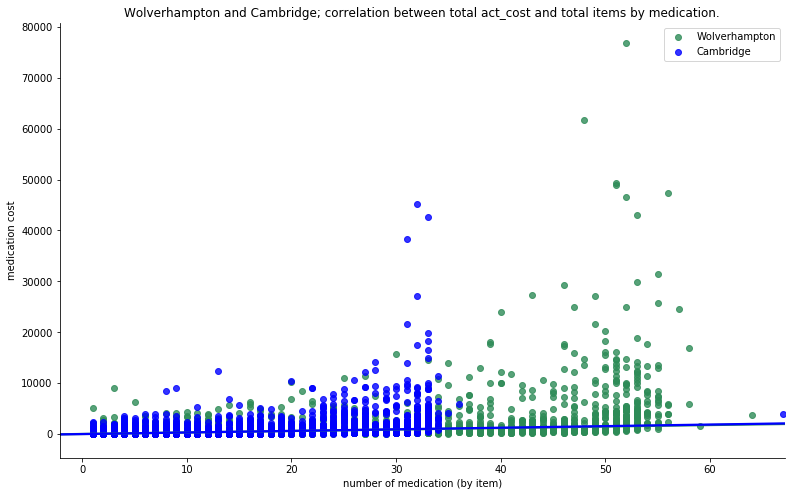

In [88]:
# Comparison of Wolverhampton and Cambridge; Scatter plot and regression line for act_cost of prescribed items.
f, ax = plt.subplots(figsize=(5, 6))
sns.regplot("items", "act_cost", data=dfwol4_merged_all, robust=True, ci=95, label='Wolverhampton', color="seagreen")
sns.regplot("items", "act_cost", data=dfcam4_merged_all, robust=True, ci=95, label='Cambridge', color="blue")
sns.despine();
plt.title('Wolverhampton and Cambridge; correlation between total act_cost and total items by medication.')
legend = plt.legend()
plt.xlabel('number of medication (by item)')
plt.ylabel('medication cost')
plt.gcf().set_size_inches(13,8)

In [89]:
# Limiting the x-axis range of act_cost values to limit the effect of outliers.
dfwol4_merged_all_outlier_limited = dfwol4_merged_all[dfwol4_merged_all['act_cost'] < 20000]
dfwol4_merged_all_outlier_limited.drop_duplicates()
dfwol4_merged_all_outlier_limited.head(10)

,bnf_name,items,act_cost
64,levothyrox sod_tab 25mcg,53,18915.55
189,ins levemir_flexpen 100u/ml 3ml pf pen,50,18272.16
496,lyrica_cap 150mg,39,18099.57
494,lyrica_cap 50mg,39,17745.99
300,pregabalin_cap 75mg,46,17643.47
31,contour next (reagent)_strips,54,17640.71
309,exenatide_inj 10mcg/0.04ml 2.4mlpfs(60d),46,17228.37
2,salbutamol_inha 100mcg (200 d) cff,58,16942.09
205,solifenacin_tab 10mg,50,16121.82
163,ins lantus solostar_100u/ml 3ml pf pen,51,16107.13


In [90]:
dfwol4_merged_all_outlier_limited.shape

(6581, 3)

In [91]:
# Limiting the x-axis range of act_cost values to limit the effect of outliers.
dfcam4_merged_all_outlier_limited = dfcam4_merged_all[dfwol4_merged_all['act_cost'] < 20000]
dfcam4_merged_all_outlier_limited.drop_duplicates()
dfcam4_merged_all_outlier_limited.head(10)

/Users/db/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,bnf_name,items,act_cost
117,tiotropium_pdr for inh cap 18mcg,32,45274.33
48,fostair_inh 100mcg/6mcg (120d) cff,33,42576.23
175,hydrocort_tab 10mg,31,38340.46
140,rivaroxaban_tab 20mg,32,27186.18
201,symbicort_turbohaler 200mcg/6mcg (120 d),31,21543.03
78,paracet_tab 500mg,33,19773.87
81,omeprazole_cap e/c 20mg,33,18280.24
90,ins novorapid_flexpen 100u/ml 3ml pf pen,32,17502.55
57,metformin hcl_tab 500mg,33,16566.13
76,levothyrox sod_tab 25mcg,33,14925.85


In [92]:
dfcam4_merged_all_outlier_limited.shape

(5473, 3)

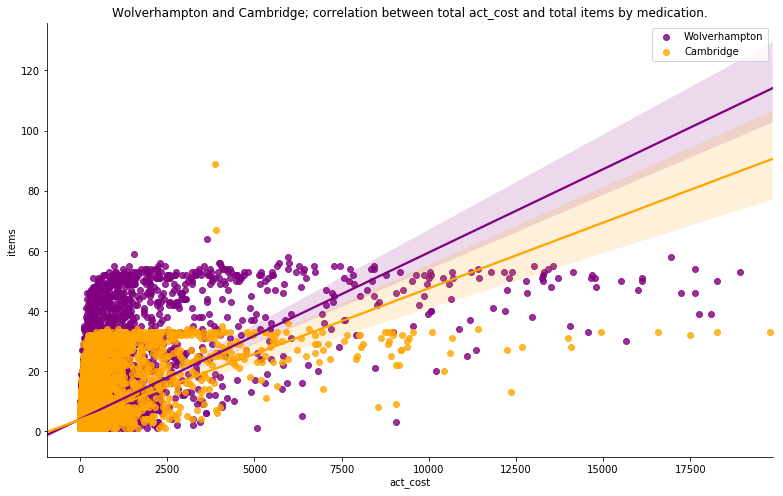

In [93]:
# Reversing the axis.
# Comparison of Wolverhampton and Cambridge; Scatter plot and regression line by medication.
f, ax = plt.subplots(figsize=(5, 6))
sns.regplot("act_cost", "items", data=dfwol4_merged_all_outlier_limited, robust=True, label='Wolverhampton', ci=95, color="purple")
sns.regplot("act_cost", "items", data=dfcam4_merged_all_outlier_limited, robust=True, label='Cambridge', ci=95, color="orange")
sns.despine();
plt.title('Wolverhampton and Cambridge; correlation between total act_cost and total items by medication.')
legend = plt.legend()
plt.xlabel('act_cost')
plt.ylabel('items')
plt.gcf().set_size_inches(13,8)

In [94]:
#

In [95]:
#

## 5/. Using SQL, produce a table that provides the number of GP practices per city, ordered in descending order.

In [96]:
# SQL preliminaries.
from pysqldf import SQLDF
sqldf = SQLDF(locals())

In [97]:
# SQL execution command for the number of GP practices per city, ordered in descending order.
sqldf.execute("SELECT COUNT(practice), address3, address4 FROM gp_practices GROUP BY address3 ORDER BY COUNT(practice) DESC;")

/Users/db/anaconda2/lib/python2.7/site-packages/pandas/io/sql.py:531: FutureWarning: the 'flavor' parameter is deprecated and will be removed in a future version, as 'sqlite' is the only supported option when SQLAlchemy is not installed.
  _validate_flavor_parameter(flavor)


,COUNT(practice),address3,address4
0,339,,london
1,173,birmingham,
2,137,liverpool,merseyside
3,122,leeds,
4,117,manchester,
5,105,sheffield,yorkshire
6,95,bristol,
7,95,coventry,
8,92,london,middlesex
9,85,bradford,


In [98]:
#